Computation of model of resistor

In [220]:
import numpy as np
import matplotlib.pyplot as plt 

In [221]:
filename1="series1_2 sensors_12 cm"
filename2="series2_2 sensors_8 cm"
filename3="series3_2 sensors_10 cm"
filename4="series4_1 sensor_10 cm"
filename5="series5_2 sensors_20 cm"
filename6="series6_2 sensors_15 cm"
filenames = [filename1, filename2, filename3, filename4, filename5, filename6]
distance = [12, 8, 10, 10, 20, 15]
nb_sensors = 3

38.0
0.0
94.0


<function matplotlib.pyplot.show(close=None, block=None)>

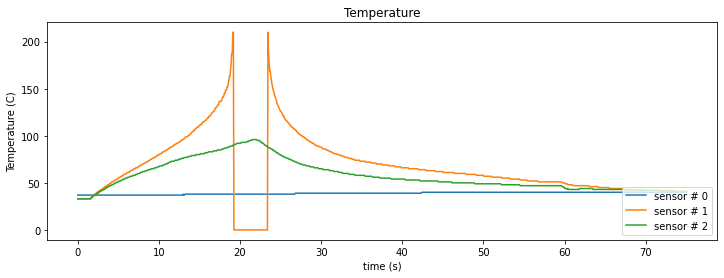

In [222]:
file_nb = 1
nb_samples_derivative = 120
time_series = np.load(filenames[file_nb] + "./data.npy", allow_pickle = True)
time_range = np.load(filenames[file_nb] + "./time_range.npy", allow_pickle = True)

fig, ax = plt.subplots(1,1)
fig.set_figwidth(12)

for sensor in range(0,nb_sensors):
    ax.plot(time_range[:], time_series[:, sensor], label="sensor # " + str(sensor))
#     print("steady state : ", np.mean(time_series[-100:, sensor]))
    print(time_series[300, sensor])
    
ax.set_title("Temperature")
ax.legend(loc='lower right')
ax.set_xlabel("time (s)")
ax.set_ylabel("Temperature (C)")
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

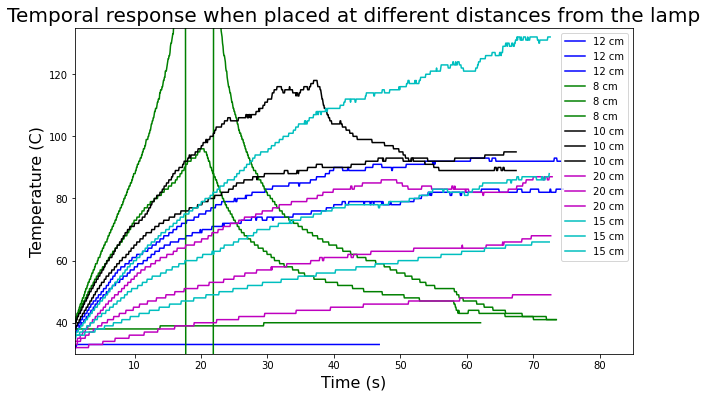

In [223]:

fontsize=20
colors = ['b','g','k','y','m','c']

# fig, ax = plt.subplots(1,1)
# fig.set_figwidth((10,12))
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)

for file in [0,1,2,4,5]:
#     print("file :", file)
    #fetch data
    time_series = np.load(filenames[file] + "./data.npy", allow_pickle = True)
    time_range = np.load(filenames[file] + "./time_range.npy", allow_pickle = True)
    dt = time_range[1]

#     # plot 
#     if file == 0 or file == 1:
#         range_sensor = range(1,nb_sensors)
#     else:
#         range_sensor = range(0,nb_sensors-1)
        
    range_sensor = range(0,nb_sensors)
    for sensor in range_sensor:
        
        # align at t=0
        t_0 = 0
        for sample in range(1,len(time_range)):
            if time_series[sample, sensor] > time_series[sample-1, sensor]:
                break
            else: 
                t_0 = sample

        time_vector = np.linspace(0, time_range[-1] - time_range[t_0], len(time_range[t_0:])) #np.arange(0, time_series[t_0:, sensor].shape[0], dt)
        
        ax.plot(time_vector, time_series[t_0:, sensor], 
                label= str(distance[file]) + " cm", color = colors[file])

        
ax.set_title("Temporal response when placed at different distances from the lamp", fontsize=fontsize)
ax.legend(loc='upper right')
ax.set_xlabel("Time (s)", fontsize=fontsize-4)
ax.set_ylabel("Temperature (C)", fontsize=fontsize-4)
ax.set_xlim([1,85])
ax.set_ylim([30,135])
plt.show       




37

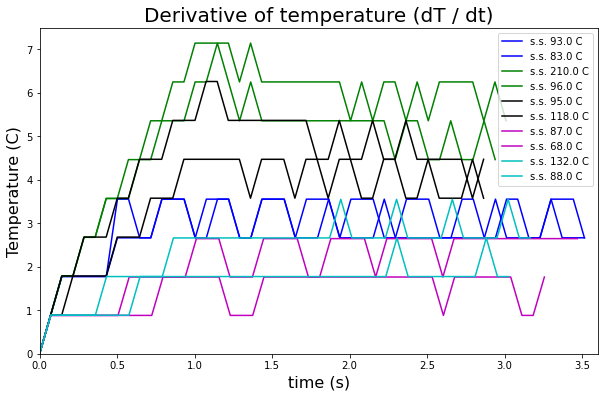

In [224]:
ss = np.zeros(nb_sensors) # steady state
fontsize=20
colors = ['b','g','k','y','m','c']
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)

for file in [0,1,2,4,5]:
    
    #fetch data
    
    nb_samples_derivative = 65
    time_series = np.load(filenames[file] + "./data.npy", allow_pickle = True)
    time_range = np.load(filenames[file] + "./time_range.npy", allow_pickle = True)
    dt = time_range[1]
    derivative = np.zeros_like(time_series)
    
    # compute derivative
    window=16
    for sensor in range(nb_sensors):
        derivative[window:, sensor] = (time_series[window:,sensor] - 
                                       time_series[:-window, sensor]) / (time_range[window:] - time_range[:-window])
        # compute steady state
#         ss[sensor] = np.mean(time_series[-100:, sensor])
        ss[sensor] = np.max(time_series[:, sensor])
    
#     print("derivative shape :", derivative)
    #     # plot 
    
    if file == 0 or file == 1 or file == 2:
        range_sensor = range(1,nb_sensors)
    else:
        range_sensor = range(0,nb_sensors-1)
        
    #range_sensor = range(0,nb_sensors)
    
    # plot derivative
    for sensor in range_sensor:
        
        # align at t=0
        t_0 = 0
        for sample in range(1,len(time_range)):
            if derivative[sample, sensor] > 0:
                break
            else: 
                t_0 = sample
                
        if file == 2:
            nb_samples_derivative = 150
            
        if file > 2:
            nb_samples_derivative = 80
        
#         print("file # ", file, " sensor # ", sensor)
        time_vector = np.linspace(0, time_range[nb_samples_derivative] - time_range[t_0], len(time_range[t_0:nb_samples_derivative]))
        
        ax.plot(time_vector, derivative[t_0:nb_samples_derivative, sensor], 
                label="s.s. " + str(ss[sensor]) + " C", color = colors[file])
                
        
ax.set_title("Derivative of temperature (dT / dt)", fontsize=fontsize)
ax.legend(loc='upper right')
ax.set_xlabel("time (s)", fontsize=fontsize-4)
ax.set_ylabel("Temperature (C)", fontsize=fontsize-4)
ax.set_ylim([0,7.5])
ax.set_xlim([0,3.6])
plt.show
t_0

37

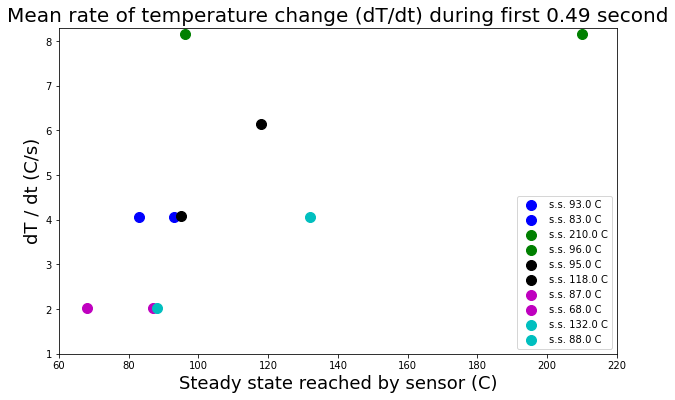

In [229]:
ss = np.zeros(nb_sensors) # steady state
fontsize=20
colors = ['b','g','k','y','m','c']
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)

for file in [0,1,2,4,5]:
    
    #fetch data
    
    nb_samples_derivative = 300
    time_series = np.load(filenames[file] + "./data.npy", allow_pickle = True)
    time_range = np.load(filenames[file] + "./time_range.npy", allow_pickle = True)
    dt = time_range[1]
    derivative = np.zeros_like(time_series)
    
    # compute derivative
    window=1
    for sensor in range(nb_sensors):
        derivative[window:, sensor] = (time_series[window:,sensor] - 
                                       time_series[:-window, sensor]) / (time_range[window:] - time_range[:-window])
        # compute steady state
#         ss[sensor] = np.mean(time_series[-100:, sensor])
        ss[sensor] = np.max(time_series[:, sensor])
    
#     print("derivative shape :", derivative)
    #     # plot 
    
    if file == 0 or file == 1 or file == 2:
        range_sensor = range(1,nb_sensors)
    else:
        range_sensor = range(0,nb_sensors-1)
        
    #range_sensor = range(0,nb_sensors)
    
    # plot derivative
    for sensor in range_sensor:
        
        # align at t=0
        t_0 = 0
        for sample in range(1,len(time_range)):
            if derivative[sample, sensor] > 0:
                break
            else: 
                t_0 = sample
        if file == 2:
            nb_samples_derivative = 150
            
        if file > 2:
            nb_samples_derivative = 80
            
        avg_window = 7
        avg_dT = np.mean(derivative[t_0:t_0 + avg_window, sensor])
#        if file == 1:
#             print("derivative[t_0:t_0 + avg_window, sensor]: ", derivative[t_0:t_0 + avg_window, sensor])
#             print("avg_dT:", avg_dT)


        ax.scatter(ss[sensor], avg_dT, 
                label="s.s. " + str(ss[sensor]) + " C", color = colors[file], s=100)
                
    
ax.set_title("Mean rate of temperature change (dT/dt) during first " + str(round(avg_window * dt,2)) + " second", fontsize=fontsize)
ax.legend(loc='lower right')
ax.set_xlabel("Steady state reached by sensor (C)", fontsize=fontsize-2)
ax.set_ylabel("dT / dt (C/s)", fontsize=fontsize-2)
ax.set_ylim([1,8.3])
ax.set_xlim([60,220])
plt.show
t_0